In [70]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil
import numpy as np

In [71]:
# matplotlib settings to match LaTeX fonts and style
latex_path = shutil.which("latex")
print("LaTeX found at:", latex_path if latex_path else "Not found in PATH")

mpl.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",  # Computer Modern serif
        "text.latex.preamble": r"\usepackage[T1]{fontenc}\usepackage{amsmath,amssymb,bm}",
        "axes.labelsize": 9,  # adjust to match \small or \normalsize
        "font.size": 9,
        "legend.fontsize": 8,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
    }
)


def set_size(width_pt=455, fraction=1, aspect=0.62):
    """Set figure dimensions to fit LaTeX doc."""
    inches_per_pt = 1 / 72.27
    width_in = width_pt * inches_per_pt * fraction
    height_in = width_in * aspect
    return (width_in, height_in)

LaTeX found at: /Library/TeX/texbin/latex


In [72]:
df_samples_test = pd.read_csv("results/ablation/samples.csv")
df_samples_train = pd.read_csv("results/ablation/samples_train.csv")
df_params = pd.read_csv("results/ablation/params.csv")

In [73]:
# Params
params = (
    df_params.groupby(["hidden_channels"])["test/NRSSE"].agg(mean="mean").reset_index()
)

samples_test = (
    df_samples_test.groupby(["nr_episodes_train"])["test/NRSSE"]
    .agg(mean="mean")
    .reset_index()
)

samples_train = (
    df_samples_train.groupby(["data.nr_episodes_train"])["train/NRSSE"]
    .agg(mean="mean")
    .reset_index()
)

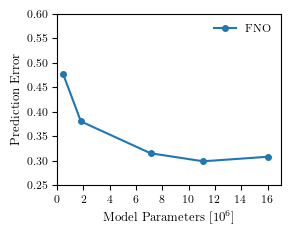

In [74]:
fig, ax = plt.subplots(figsize=set_size(455, fraction=0.45, aspect=0.8))

# x = params["hidden_channels"].values
x = [0.446, 1.8, 7.1, 11.1, 16]  # in 1e6
y = list(params["mean"].values) + [0.308]

plt.plot(x, y, label="FNO", marker="o", markersize=4)

ax.set_xlabel(r"Model Parameters $[10^6]$")
ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16])
ax.set_xlim(left=0, right=17)
ax.set_ylabel(r"Prediction Error")
# ax.set_title(rf"Rayleigh number ($\mathrm{{Ra}}={RA:.0e}$)")
ax.set_ylim(bottom=0.25, top=0.6)
# ax.set_xlim(left=0, right=100)
ax.legend(frameon=False)
fig.tight_layout(pad=0.5)
fig.savefig("figs/params.pdf")

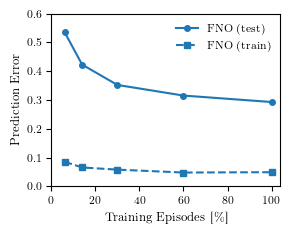

In [87]:
fig, ax = plt.subplots(figsize=set_size(455, fraction=0.45, aspect=0.8))

x = samples_test["nr_episodes_train"].values
y_test = samples_test["mean"].values
y_train = samples_train["mean"].values

plt.plot(x, y_test, label="FNO (test)", marker="o", markersize=4)
plt.plot(x, y_train, "--", label="FNO (train)", marker="s", markersize=4, color="C0")

ax.set_xlabel(r"Training Episodes [\%]")
ax.set_xlim(left=0, right=52)
ax.set_xticks([0, 10, 20, 30, 40, 50], labels=[0, 20, 40, 60, 80, 100])
ax.set_ylabel(r"Prediction Error")
# ax.set_title(rf"Rayleigh number ($\mathrm{{Ra}}={RA:.0e}$)")
ax.set_ylim(bottom=0, top=0.6)
# ax.set_xlim(left=0, right=100)
ax.legend(frameon=False)
fig.tight_layout(pad=0.5)
fig.savefig("figs/samples.pdf")